In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u

In [6]:
act = pd.read_csv('/home/rt2122/Data/clusters/tmp/act.csv')
planck_z = pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv')
#mcxcwp = pd.read_csv('/home/rt2122/Data/clusters/mcxcwp.csv')
erosita_x = [2.13309173272933e-001,
3.98459796149490e-001,
6.15864099660249e-001,
8.37544733861835e-001,
9.92090600226501e-001,
1.43624915062288e+000,
1.97970554926387e+000]
erosita_y = [5.15067443377171e-001,
1.13215824784021e+000,
1.85362829443590e+000,
2.53806553209291e+000,
2.87703077426018e+000,
3.39617301965018e+000,
3.80169568560454e+000]

In [7]:
k = erosita_y[1] / erosita_x[1]

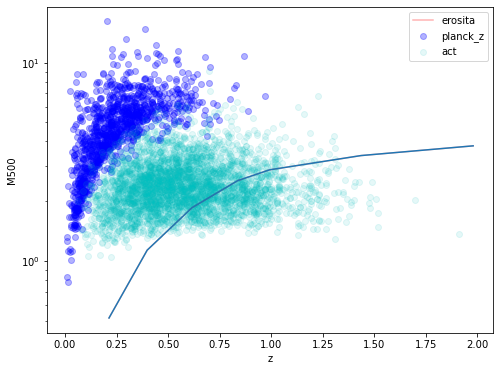

In [8]:
_, ax = plt.subplots(figsize=(8, 6))
line = ax.scatter(planck_z['z'], planck_z['M500'], c='b', alpha=0.3)
line.set_label('planck_z')
line, = ax.plot(erosita_x, erosita_y, c='r', alpha=0.3)
line.set_label('erosita')
line = ax.scatter(act['z'], act['M500'], c='c', alpha=0.1)
line.set_label('act')
ax.set_xlabel('z')
ax.set_ylabel('M500')
ax.plot(erosita_x, erosita_y)
ax.legend()
plt.yscale('log')
#y>=8x/3

In [10]:
act_cut = act[act['M500'] >= (k * act['z'])]
len(act), len(act_cut)

(3720, 2980)

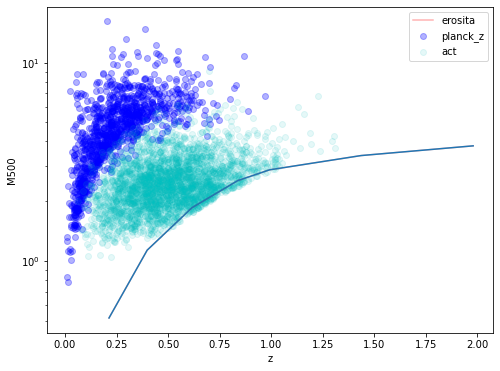

In [11]:
_, ax = plt.subplots(figsize=(8, 6))
line = ax.scatter(planck_z['z'], planck_z['M500'], c='b', alpha=0.3)
line.set_label('planck_z')
line = ax.scatter(act_cut['z'], act_cut['M500'], c='c', alpha=0.1)
line.set_label('act')
line, = ax.plot(erosita_x, erosita_y, c='r', alpha=0.3)
line.set_label('erosita')
ax.set_xlabel('z')
ax.set_ylabel('M500')
ax.plot(erosita_x, erosita_y)
plt.yscale('log')
ax.legend()
#y>=8x/3

In [12]:
act_cut.to_csv('/home/rt2122/Data/clusters/act_erosita.csv', index=False)

In [13]:
len(act_cut)

2980

In [14]:
len(pd.read_csv('/home/rt2122/Data/clusters/act_cut.csv'))

3110

In [2]:
pz = pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv')
act = pd.read_csv('/home/rt2122/Data/clusters/act.csv')
act_cut = pd.read_csv('/home/rt2122/Data/clusters/tmp/act_cut.csv')
act_ros = pd.read_csv('/home/rt2122/Data/clusters/tmp/act_erosita.csv')

In [4]:
pz_sc = SkyCoord(ra=np.array(pz['RA'])*u.degree, dec=np.array(pz['DEC'])*u.degree, frame='icrs')
act_sc = SkyCoord(ra=np.array(act['RA'])*u.degree, dec=np.array(act['DEC'])*u.degree, frame='icrs')
cut_sc = SkyCoord(ra=np.array(act_cut['RA'])*u.degree, dec=np.array(act_cut['DEC'])*u.degree, frame='icrs')
ros_sc = SkyCoord(ra=np.array(act_ros['RA'])*u.degree, dec=np.array(act_ros['DEC'])*u.degree, frame='icrs')

In [5]:
_, d2d, _ = pz_sc.match_to_catalog_sky(act_sc)
print(np.count_nonzero(d2d.degree < 5 / 60))
_, d2d, _ = pz_sc.match_to_catalog_sky(cut_sc)
print(np.count_nonzero(d2d.degree < 5 / 60))
_, d2d, _ = pz_sc.match_to_catalog_sky(ros_sc)
print(np.count_nonzero(d2d.degree < 5 / 60))

0
0
0


In [7]:
_, d2d, _ = act_sc.match_to_catalog_sky(cut_sc)
print(np.count_nonzero(d2d.degree < 5 / 60), len(act), len(act_cut))
_, d2d, _ = act_sc.match_to_catalog_sky(ros_sc)
print(np.count_nonzero(d2d.degree < 5 / 60), len(act), len(act_ros))

3112 3720 3110
2982 3720 2980


In [9]:
len(act) - len(act_cut), len(act) - len(act_ros)

(610, 740)